# PERSONAL CAPSTONE

Dataset:[Hotel Reviews](https://data.world/datafiniti/hotel-reviews)

What can be done with this data.

* What are the bottom and top states for hotel reviews by average rating?
* What is the correlation between a state’s population and their number of hotel reviews?
* What is the correlation between a state’s tourism budget and their number of hotel reviews?
* Fit a regression model on reviews and score to see which words are more indicative to a higher/lower score
* Perform a sentiment analysis on the reviews
* Find correlation between reviewer's nationality and scores.
* Beautiful and informative visualization on the dataset.
* Clustering hotels based on reviews
* Simple recommendation engine to the guest who is fond of a special characteristic of hotel.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from IPython.display import Image
from IPython.display import display
import seaborn as sns

import time

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.feature_selection import f_classif, f_regression, SelectKBest


import warnings
# Suppress annoying harmless error.
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")

#import plotly.plotly as py
#import plotly.tools as tls

## Import Data

In [2]:
df  = pd.read_csv('datafiniti_hotel_reviews.csv')
print('The shape of the data is:', df.shape)

The shape of the data is: (10000, 26)


In [3]:
display(df.head())

,id,dateadded,dateupdated,address,categories,primarycategories,city,country,keys,latitude,...,reviews_rating,reviews_sourceurls,reviews_text,reviews_title,reviews_usercity,reviews_userprovince,reviews_username,sourceurls,websites,location
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,POINT(-117.186136 32.990959)
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,POINT(-117.186136 32.990959)
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,POINT(-117.186136 32.990959)
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,POINT(-76.716341 39.155929)
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,POINT(-76.716341 39.155929)


In [4]:
df.columns

Index(['id', 'dateadded', 'dateupdated', 'address', 'categories',
       'primarycategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalcode', 'province', 'reviews_date', 'reviews_dateseen',
       'reviews_rating', 'reviews_sourceurls', 'reviews_text', 'reviews_title',
       'reviews_usercity', 'reviews_userprovince', 'reviews_username',
       'sourceurls', 'websites', 'location'],
      dtype='object')

In [5]:
df.dtypes

id                       object
dateadded                object
dateupdated              object
address                  object
categories               object
primarycategories        object
city                     object
country                  object
keys                     object
latitude                float64
longitude               float64
name                     object
postalcode               object
province                 object
reviews_date             object
reviews_dateseen         object
reviews_rating          float64
reviews_sourceurls       object
reviews_text             object
reviews_title            object
reviews_usercity         object
reviews_userprovince     object
reviews_username         object
sourceurls               object
websites                 object
location                 object
dtype: object

In [6]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

reviews_text               1
reviews_usercity        5836
reviews_userprovince    7295
dtype: int64

In [7]:
## Assumptions: We are just going to Assume that people who didn't fill out the city and State Value 
#Lived in the Same State and City 
## For the empty values in reviews_userprovince replace by the value of province  
## For the empty values in reviews_usercity  replace by the value of city
df['reviews_userprovince'].fillna(value = df['province'], inplace=True)
df['reviews_usercity'].fillna(value = df['city'], inplace=True)

In [8]:
df = df.drop(['id','keys','latitude','longitude','reviews_sourceurls','sourceurls','websites','location'],1)

In [9]:
## convert dates to date time object
df['dateadded']=df['dateadded'].str[:10]
df['dateadded'] = pd.to_datetime(df['dateadded'])

df['dateupdated']=df['dateupdated'].str[:10]
df['dateupdated'] = pd.to_datetime(df['dateupdated'])

df['reviews_date'] = df['reviews_date'].str[:10]
df['reviews_date'] = pd.to_datetime(df['reviews_date'])

df['reviews_dateseen']=df['reviews_dateseen'].str[:10]
df['reviews_dateseen'] = pd.to_datetime(df['reviews_dateseen'])

In [10]:
df.dtypes

dateadded               datetime64[ns]
dateupdated             datetime64[ns]
address                         object
categories                      object
primarycategories               object
city                            object
country                         object
name                            object
postalcode                      object
province                        object
reviews_date            datetime64[ns]
reviews_dateseen        datetime64[ns]
reviews_rating                 float64
reviews_text                    object
reviews_title                   object
reviews_usercity                object
reviews_userprovince            object
reviews_username                object
dtype: object

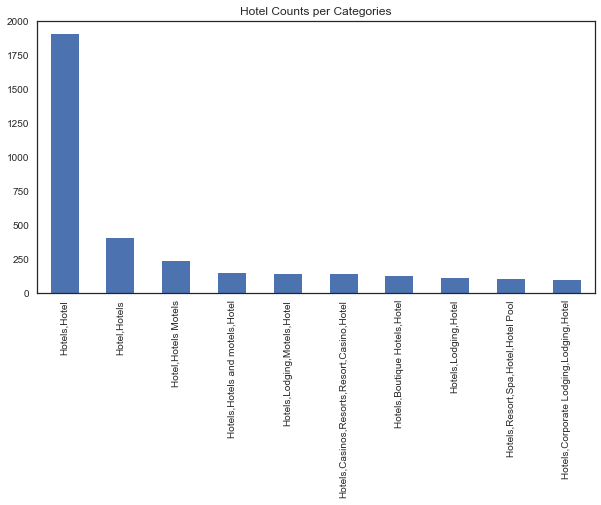

In [11]:
# List of Categories 
plt.figure(figsize=(10, 5))
df.categories.value_counts().head(10).plot(kind='bar')
plt.title('Hotel Counts per Categories')
plt.show()

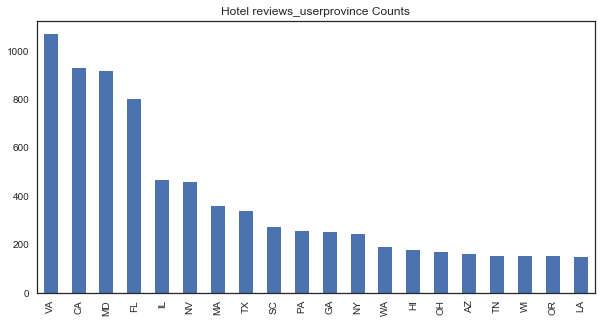

In [12]:
plt.figure(figsize=(10, 5))
df.reviews_userprovince.value_counts().head(20).plot(kind='bar')
plt.title('Hotel reviews_userprovince Counts')
plt.show()

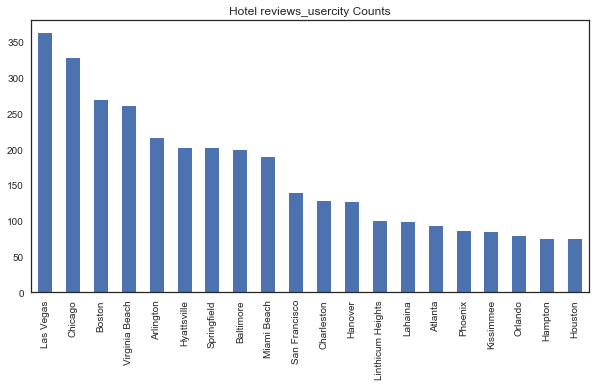

In [13]:
plt.figure(figsize=(10, 5))
df.reviews_usercity.value_counts().head(20).plot(kind='bar')
plt.title('Hotel reviews_usercity Counts')
plt.show()

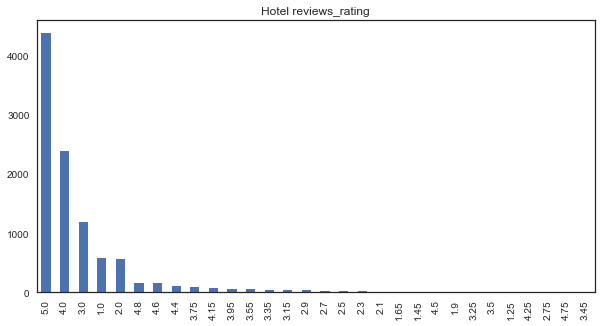

In [14]:
# List of Categories 
plt.figure(figsize=(10, 5))
df.reviews_rating.value_counts().plot(kind='bar')
plt.title('Hotel reviews_rating')
plt.show()

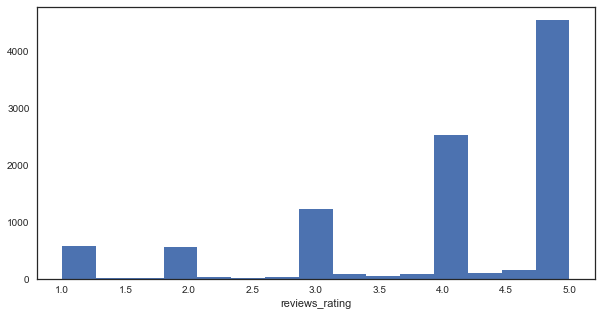

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(df['reviews_rating'], bins = 15) 
plt.xlabel('reviews_rating')
plt.show() 

## Clean Data

In [16]:
df['reviews_title'].head()

0             Best romantic vacation ever!!!!
1                        Sweet sweet serenity
2             Amazing Property and Experience
3    Never again...beware, if you want sleep.
4                        ALWAYS GREAT STAY...
Name: reviews_title, dtype: object

In [17]:
df['reviews_text'].head()

0    Our experience at Rancho Valencia was absolute...
1    Amazing place. Everyone was extremely warm and...
2    We booked a 3 night stay at Rancho Valencia to...
3    Currently in bed writing this for the past hr ...
4    I live in Md and the Aloft is my Home away fro...
Name: reviews_text, dtype: object

In [18]:
#Here we clean the reviews by removing all the  punctuation, 
#removing all that is unnecessary.

df['reviews_title'] = df['reviews_title'].str.replace(r'[^a-zA-Z0-9 ]', "",).fillna('')
df['reviews_title'] = df['reviews_title'].str.lower()
df['reviews_text'] = df['reviews_text'].str.replace(r'[^a-zA-Z0-9 ]', "",).fillna('')
df['reviews_text'] = df['reviews_text'].str.lower()

In [19]:
df['reviews_title'].head()

0            best romantic vacation ever
1                   sweet sweet serenity
2        amazing property and experience
3    never againbeware if you want sleep
4                      always great stay
Name: reviews_title, dtype: object

In [20]:
df['reviews_text'].head()

0    our experience at rancho valencia was absolute...
1    amazing place everyone was extremely warm and ...
2    we booked a 3 night stay at rancho valencia to...
3    currently in bed writing this for the past hr ...
4    i live in md and the aloft is my home away fro...
Name: reviews_text, dtype: object

In [21]:
print('The shape of the data is:', df.shape)
display(df.head())

The shape of the data is: (10000, 18)


,dateadded,dateupdated,address,categories,primarycategories,city,country,name,postalcode,province,reviews_date,reviews_dateseen,reviews_rating,reviews_text,reviews_title,reviews_usercity,reviews_userprovince,reviews_username
0,2016-10-30,2018-09-10,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,Rancho Valencia Resort Spa,92067,CA,2013-11-14,2016-08-03,5.0,our experience at rancho valencia was absolute...,best romantic vacation ever,Rancho Santa Fe,CA,Paula
1,2016-10-30,2018-09-10,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,Rancho Valencia Resort Spa,92067,CA,2014-07-06,2016-08-02,5.0,amazing place everyone was extremely warm and ...,sweet sweet serenity,Rancho Santa Fe,CA,D
2,2016-10-30,2018-09-10,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,Rancho Valencia Resort Spa,92067,CA,2015-01-02,2016-11-15,5.0,we booked a 3 night stay at rancho valencia to...,amazing property and experience,Rancho Santa Fe,CA,Ron
3,2015-11-28,2018-09-10,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,Aloft Arundel Mills,21076,MD,2016-05-15,2016-05-21,2.0,currently in bed writing this for the past hr ...,never againbeware if you want sleep,Richmond,VA,jaeem2016
4,2015-11-28,2018-09-10,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,Aloft Arundel Mills,21076,MD,2016-07-09,2016-07-31,5.0,i live in md and the aloft is my home away fro...,always great stay,Laurel,MD,MamaNiaOne
